# Changing Colorspaces

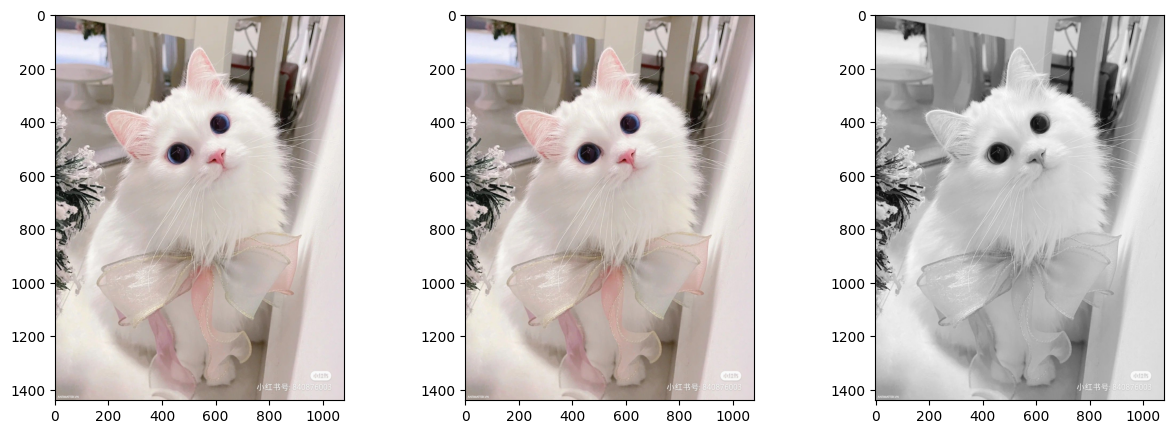

In [108]:
# Changing Color-space
# For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.
# For BGR -> Gray conversion we use the flags cv2.COLOR_BGR2GRAY. 
# For BGR -> HSV, we use the flag cv2.COLOR_BGR2HSV. 

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('1.jpg')

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))

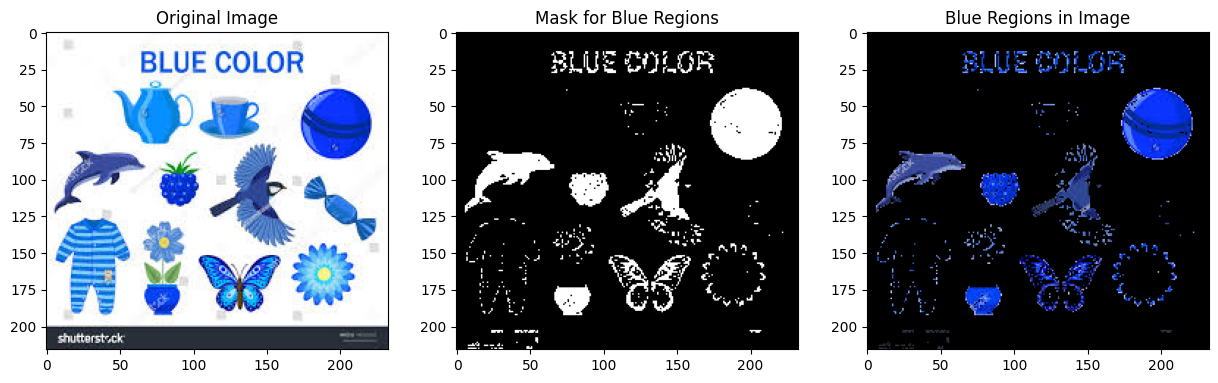

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('blue_image.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Định nghĩa phạm vi màu xanh lam trong không gian màu HSV
# Hue khoảng từ 110-130, Saturation và Value có thể tùy chỉnh theo nhu cầu
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# Tạo mặt nạ để chỉ chứa các vùng màu xanh lam của image_hsv
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Áp dụng mặt nạ lên hình ảnh gốc để chỉ hiển thị khu vực màu xanh lam
blue_regions = cv2.bitwise_and(image, image, mask=mask)

# Hiển thị ảnh gốc và ảnh chỉ chứa vùng màu xanh lam
plt.figure(figsize=[15, 5])

# Hiển thị ảnh gốc
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Hiển thị mặt nạ
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title("Mask for Blue Regions")

# Hiển thị ảnh với chỉ vùng màu xanh lam
plt.subplot(133)
plt.imshow(cv2.cvtColor(blue_regions, cv2.COLOR_BGR2RGB))
plt.title("Blue Regions in Image")

plt.show()

In [41]:
# xác định phạm vi màu trong không gian HSV
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

# lấy [H-10, 100,100] và [H+10, 255, 255] như giới hạn dưới và giới hạn trên

[[[120 255 255]]]


# Image Thresholding

Image Thresholding là một kỹ thuật xử lý ảnh nhằm phân đoạn hình ảnh thành các vùng dựa trên độ sáng của pixel. Ý tưởng chính là chọn một giá trị ngưỡng (threshold value) và gán một giá trị mới cho các pixel dựa trên việc chúng có lớn hơn hay nhỏ hơn giá trị ngưỡng đó.

Các kỹ thuật thresholding thường được sử dụng để phân biệt đối tượng (foreground) khỏi nền (background) trong các hình ảnh grayscale.

Các loại Thresholding cơ bản
1. Simple Thresholding: Đơn giản nhất là chọn một giá trị ngưỡng cố định. Pixel nào có giá trị lớn hơn ngưỡng sẽ được gán một giá trị mới (thường là màu trắng - 255), còn lại sẽ được gán màu đen (0).
2. Adaptive Thresholding: Khi hình ảnh có các vùng sáng tối không đồng đều, adaptive thresholding giúp chọn giá trị ngưỡng khác nhau cho các phần nhỏ của ảnh dựa trên các tính toán cục bộ (local).
3. Otsu's Binarization: Đây là phương pháp tự động tìm ra giá trị ngưỡng tối ưu để phân đoạn ảnh, đặc biệt hữu ích khi histogram của ảnh có 2 đỉnh (ảnh có hai vùng sáng và tối rõ rệt).

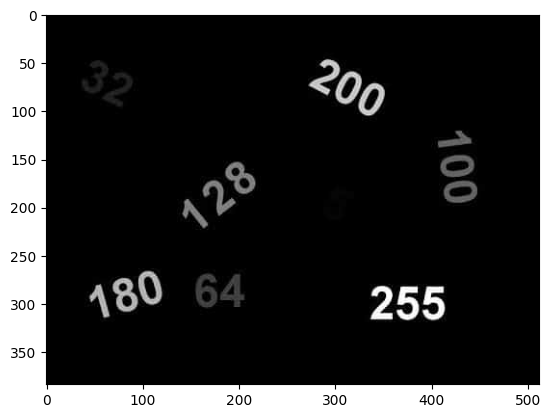

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('thresh_image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [43]:
print(image.shape)

(384, 512, 3)


Ngưỡng nhị phân


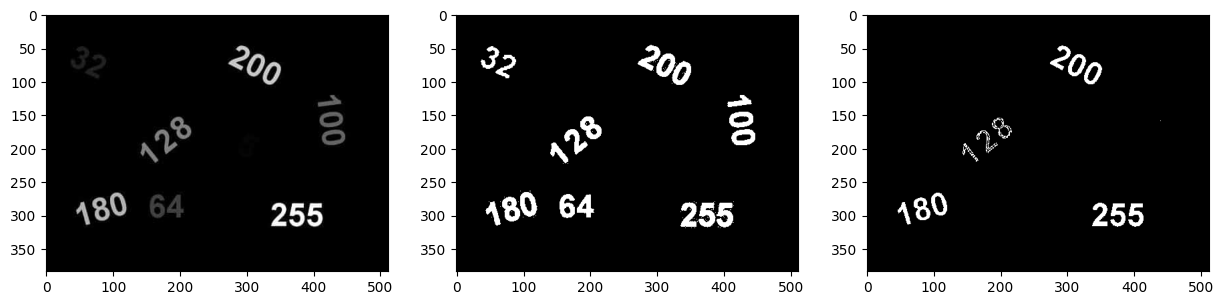

In [44]:
# if src(x,y) > thresh -->  dst(x,y) = maxValue
# else -->  dst(x,y) = 0

thresh_0 = 20
maxValue = 255
_, dst_0_255 = cv2.threshold(image, thresh_0, maxValue, cv2.THRESH_BINARY)

thresh_128 = 128
_, dst_128_255 = cv2.threshold(image, thresh_128, maxValue, cv2.THRESH_BINARY)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(dst_0_255, cmap='gray')
plt.subplot(133)
plt.imshow(dst_128_255, cmap='gray')

plt.show()

Ngưỡng nhị phân nghịch đảo


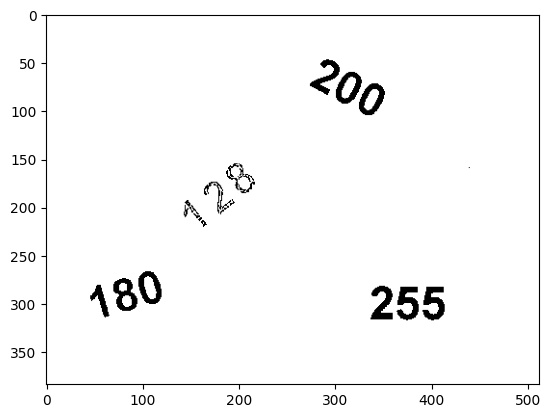

In [45]:
thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_BINARY_INV)
plt.imshow(dst, cmap='gray')

Ngưỡng cắt bớt ( THRESH_TRUNC )


127.0


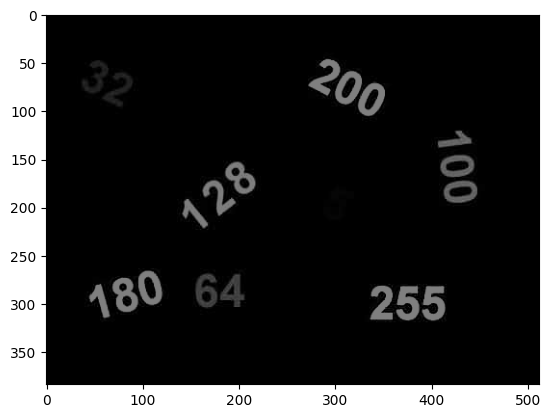

In [46]:
# if src(x,y) > thresh
#   dst(x,y) = thresh
# else
#   dst(x,y) = src(x,y)
# Trên ngưỡng thì đưa về ngưỡng, dưới ngưỡng thì giữ nguyên

thresh = 127
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TRUNC)
print(th)
plt.imshow(dst, cmap='gray')

Ngưỡng về 0 ( THRESH_TOZERO )


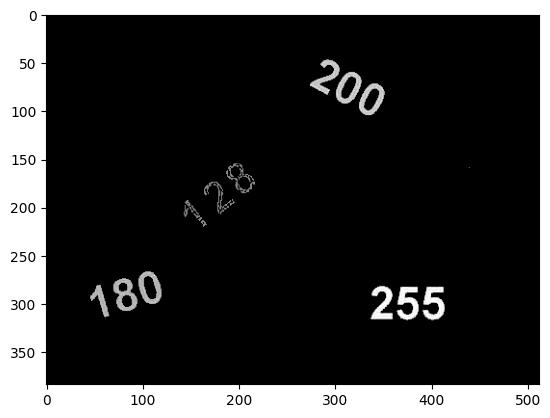

In [47]:
# if src(x,y) > thresh
#   dst(x,y) = src(x,y)
# else
#   dst(x,y) = 0
# Trên ngưỡng thì giữ nguyên, dưới ngưỡng thì về 0

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO)
plt.imshow(dst, cmap='gray')

Ngưỡng đảo ngược về 0 ( THRESH_TOZERO_INV )


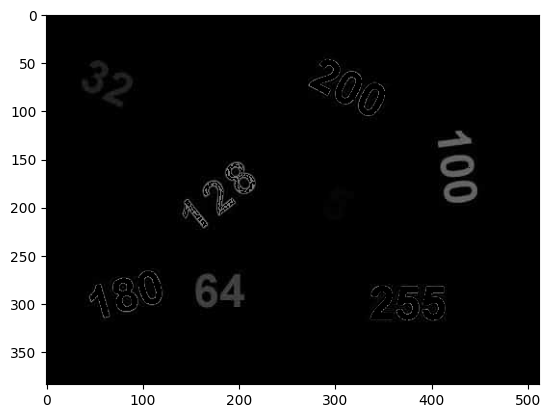

In [48]:
# if src(x,y) > thresh
#   dst(x,y) = 0
# else
#   dst(x,y) = src(x,y)
# Trên ngưỡng thì về 0, dưới ngưỡng thì giữ nguyên

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO_INV)
plt.imshow(dst, cmap='gray')

Ngưỡng thích ứng


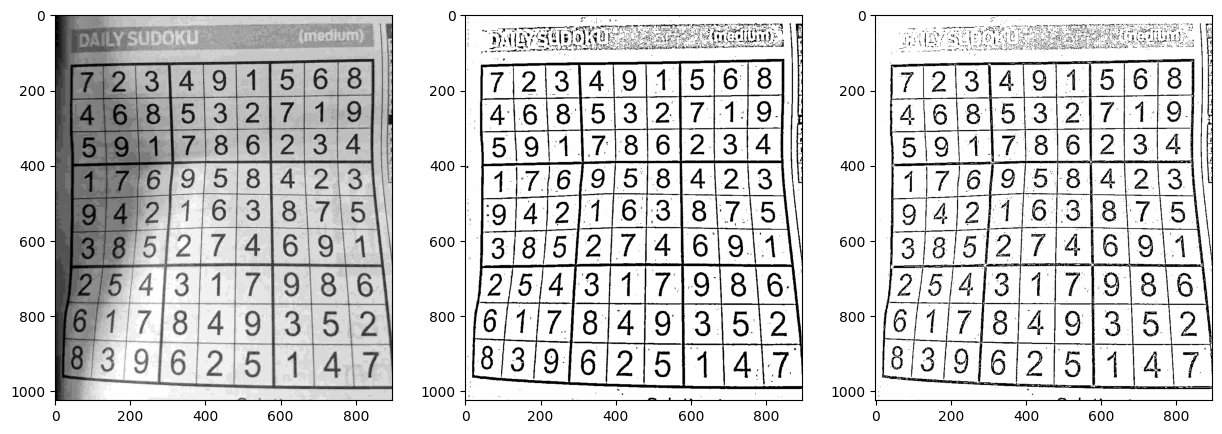

In [54]:
# Thuật toán tính ngưỡng sẽ tính giá trị ngưỡng cho mỗi pixel hoặc mỗi vùng nhỏ, tức là trong cùng một ảnh sẽ có giá trị ngưỡng khác nhau cho 
# các vùng/pixel khác nhau. Và nó mang lại hiệu quả tốt cho những ảnh có nhiều độ sáng khác nhau.
#
# Adaptive Method - It decides how thresholding value is calculated.
#     --> cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.    
#     --> cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window
#
# Block Size - It decides the size of neighbourhood area 
# 
# C - It is just a constant which is subtracted from the mean or weighted mean caculate

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

blockSize = 15

C = 15

image_median = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
image_gauss = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(image_median, cmap='gray')
plt.subplot(133)
plt.imshow(image_gauss, cmap='gray')

plt.show()

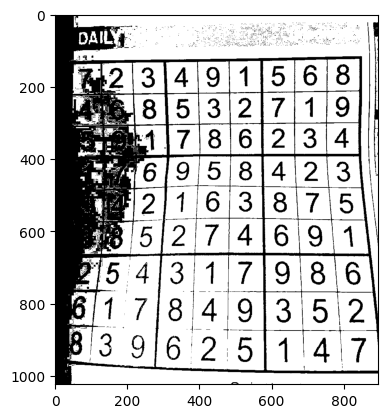

In [50]:
_, dst = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')

Ngưỡng Otsu

Ngưỡng Otsu hoạt động dựa trên nguyên tắc tối ưu hóa giữa các lớp (inter-class variance) của mức xám trong ảnh. Mục tiêu là tìm ra một ngưỡng giá trị 𝑡 mà tại đó độ lệch giữa các lớp (foreground và background) là lớn nhất. Cách thực hiện cụ thể như sau:

1. Tính Histogram: Tạo một histogram của ảnh, thể hiện tần số xuất hiện của các mức xám từ 0 đến 255.

2. Tính Xác Suất Tích Lũy: Xác định xác suất tích lũy và giá trị trung bình tích lũy cho mỗi mức xám.

3. Tính Độ Lệch Giữa Các Lớp: Sử dụng các giá trị xác suất và trung bình tích lũy để tính toán độ lệch giữa các lớp cho mỗi ngưỡng giá trị 𝑡.

4. Chọn Ngưỡng Tối Ưu: Tìm giá trị ngưỡng 𝑡 mà tại đó độ lệch giữa các lớp là lớn nhất.

Xác suất tích lũy tại mức xám k theo công thức P(k) = ∑(i=0 -> k) H(i) / N trong đó n là tổng số pixel

Giá trị trung bình tích lũy tại mức xám k theo công thức μ(k) = ∑(i=0 -> k) i * H(i) / N

Text(0.5, 1.0, 'Original histogram')

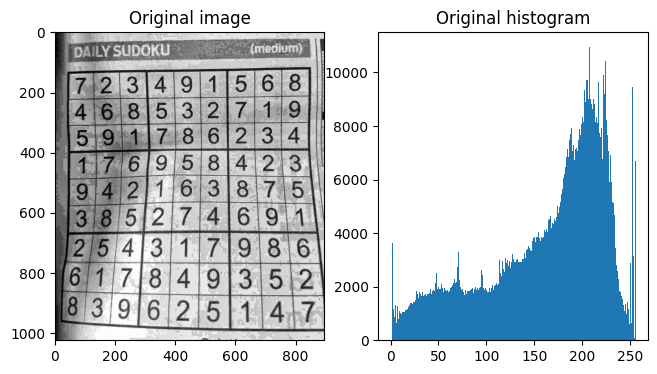

In [91]:
image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clipLimit = 2.0 có ý nghĩa nếu mỗi title có 256 điểm ảnh 
                                                           # thì contrast limiting là 2.0 * 256 / 256 = 2

plt.figure(figsize=[16,4])

image = clahe.apply(image)
plt.subplot(141); plt.imshow(image, cmap='gray'); plt.title('Original image')
plt.subplot(142);plt.hist(image.ravel(),256,[0,256]); plt.title('Original histogram')

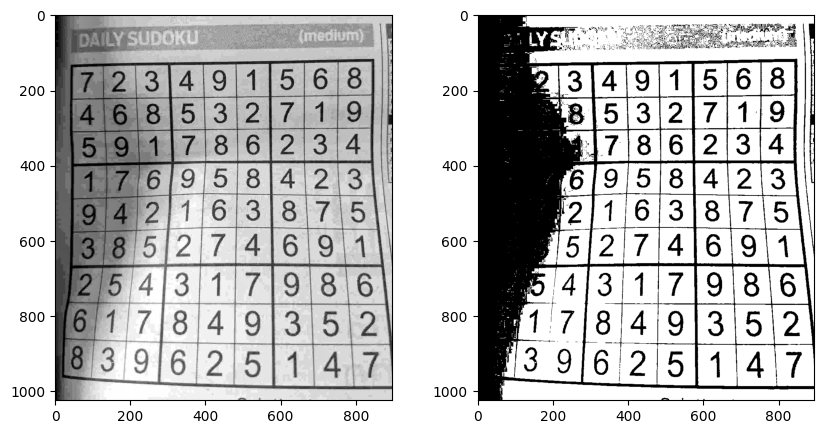

In [89]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng ngưỡng Otsu
# Lưu ý rằng nên truyền giá trị ngưỡng ban đầu bằng 0
# và chỉ định loại phân ngưỡng bằng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Original histogram')

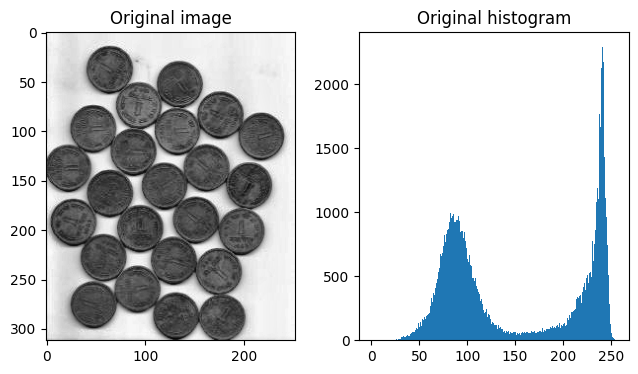

In [92]:
image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clipLimit = 2.0 có ý nghĩa nếu mỗi title có 256 điểm ảnh 
                                                           # thì contrast limiting là 2.0 * 256 / 256 = 2

plt.figure(figsize=[16,4])

image = clahe.apply(image)
plt.subplot(141); plt.imshow(image, cmap='gray'); plt.title('Original image')
plt.subplot(142);plt.hist(image.ravel(),256,[0,256]); plt.title('Original histogram')

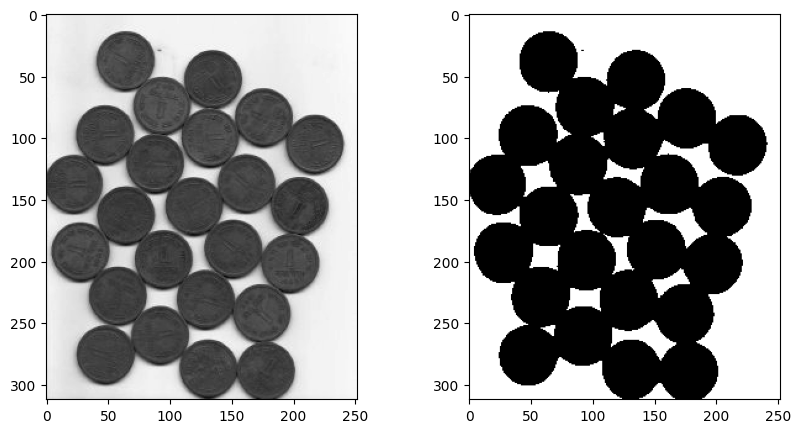

In [93]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng ngưỡng Otsu
# Lưu ý rằng nên truyền giá trị ngưỡng ban đầu bằng 0
# và chỉ định loại phân ngưỡng bằng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()

# Smoothing Images

2D Convolution ( Image Filtering )

**Image Blurring (Image Smoothing)**

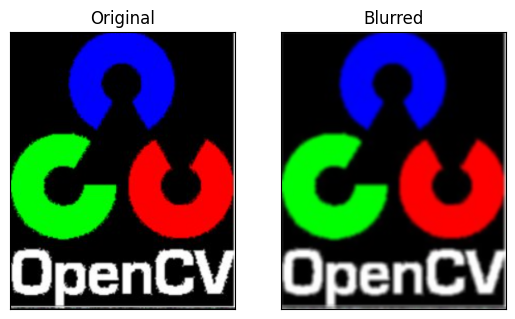

In [88]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('blur1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
 
blur = cv.blur(img,(5,5))
 
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**Gaussian Blurring**

Trong phương pháp này, thay vì bộ lọc hộp, một hạt nhân Gaussian được sử dụng. Nó được thực hiện với hàm cv.GaussianBlur() . Chúng ta nên chỉ định chiều rộng và chiều cao của hạt nhân, phải là số dương và số lẻ. Chúng ta cũng nên chỉ định độ lệch chuẩn theo hướng X và Y, tương ứng là sigmaX và sigmaY. Nếu chỉ chỉ định sigmaX, sigmaY được coi là giống như sigmaX. Nếu cả hai đều được đưa ra dưới dạng số không, chúng được tính toán từ kích thước hạt nhân. Làm mờ Gaussian rất hiệu quả trong việc loại bỏ nhiễu Gaussian khỏi hình ảnh.



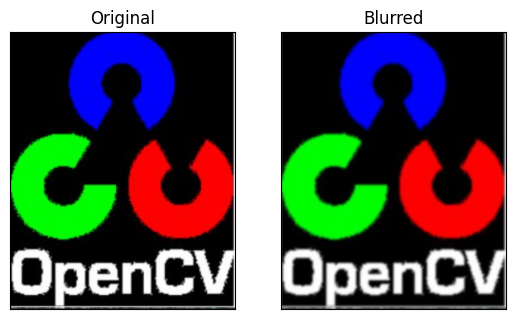

In [86]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('blur1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
 
blur = cv.GaussianBlur (img,(5,5),0)
 
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**Median Blurring**

Ở đây, hàm cv.medianBlur() lấy giá trị trung bình của tất cả các pixel bên dưới vùng hạt nhân và phần tử trung tâm được thay thế bằng giá trị trung bình này. Điều này rất hiệu quả đối với nhiễu muối và tiêu trong một hình ảnh. Điều thú vị là trong các bộ lọc trên, phần tử trung tâm là một giá trị mới được tính toán có thể là một giá trị pixel trong hình ảnh hoặc một giá trị mới. Nhưng trong làm mờ trung bình, phần tử trung tâm luôn được thay thế bằng một số giá trị pixel trong hình ảnh. Nó làm giảm nhiễu hiệu quả. Kích thước hạt nhân của nó phải là một số nguyên lẻ dương.

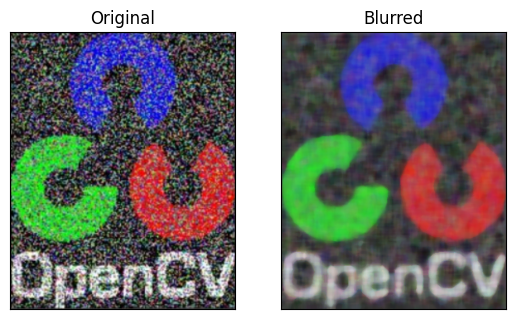

In [82]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('blur2.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.medianBlur (img,11) 
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**Bilateral Filtering**


cv.bilateralFilter() có hiệu quả cao trong việc loại bỏ nhiễu trong khi vẫn giữ cho các cạnh sắc nét. Nhưng thao tác này chậm hơn so với các bộ lọc khác. Chúng ta đã thấy rằng bộ lọc Gaussian lấy vùng lân cận xung quanh điểm ảnh và tìm giá trị trung bình có trọng số Gaussian của nó. Bộ lọc Gaussian này là một hàm của không gian riêng, nghĩa là, các điểm ảnh gần đó được xem xét trong khi lọc. Nó không xem xét liệu các điểm ảnh có cường độ gần như giống nhau hay không. Nó không xem xét liệu một điểm ảnh có phải là điểm ảnh cạnh hay không. Vì vậy, nó cũng làm mờ các cạnh, điều mà chúng ta không muốn làm.

Lọc song phương cũng sử dụng bộ lọc Gaussian trong không gian, nhưng thêm một bộ lọc Gaussian nữa là hàm của sự khác biệt về pixel. Hàm Gaussian của không gian đảm bảo rằng chỉ những pixel gần đó mới được xem xét để làm mờ, trong khi hàm Gaussian của sự khác biệt về cường độ đảm bảo rằng chỉ những pixel có cường độ tương tự như pixel trung tâm mới được xem xét để làm mờ. Vì vậy, nó bảo toàn các cạnh vì các pixel ở các cạnh sẽ có sự thay đổi cường độ lớn.

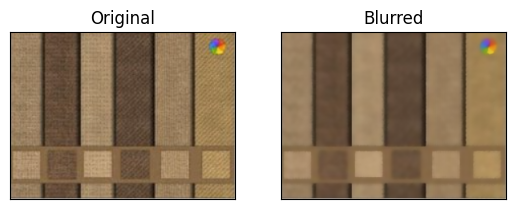

In [76]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('Bilateral_Filtering.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur =  cv.bilateralFilter (img,9,75,75)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Gradients

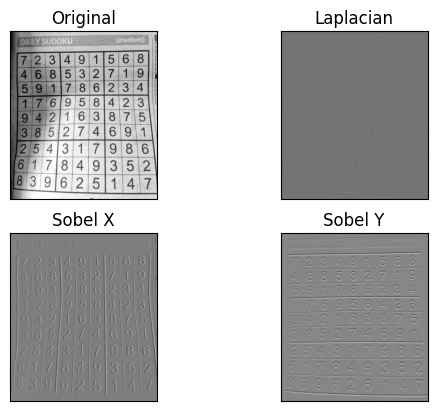

In [103]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('adaptive_thresh.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()


# Canny Edge Detection

Canny Edge Detection là một thuật toán phát hiện cạnh phổ biến. Nó được phát triển bởi John F. Canny vào năm

1. Đây là thuật toán nhiều giai đoạn và chúng ta sẽ thực hiện từng giai đoạn.
2. Noise Reduction

Vì phát hiện cạnh dễ bị nhiễu trong ảnh, bước đầu tiên là loại bỏ nhiễu trong ảnh bằng bộ lọc Gaussian 5x5. 

3. Tìm cường độ Gradient của hình ảnh

Sau đó, hình ảnh được làm mịn được lọc bằng hạt nhân Sobel theo cả hướng ngang và hướng dọc để có được đạo hàm đầu tiên theo hướng ngang (Gx) và hướng thẳng đứng (Gy). Từ hai hình ảnh này, chúng ta có thể tìm ra độ dốc cạnh và hướng cho từng điểm ảnh như sau:

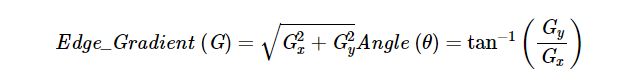

Hướng gradient luôn vuông góc với các cạnh. Nó được làm tròn thành một trong bốn góc biểu thị hướng dọc, hướng ngang và hai hướng chéo.

**Non-maximum Suppression**

Sau khi có được độ lớn và hướng của gradient, một lần quét toàn bộ hình ảnh được thực hiện để loại bỏ bất kỳ pixel không mong muốn nào có thể không tạo thành cạnh. Đối với điều này, tại mỗi pixel, pixel được kiểm tra xem nó có phải là giá trị cực đại cục bộ trong vùng lân cận của nó theo hướng của gradient hay không. Kiểm tra hình ảnh bên dưới:

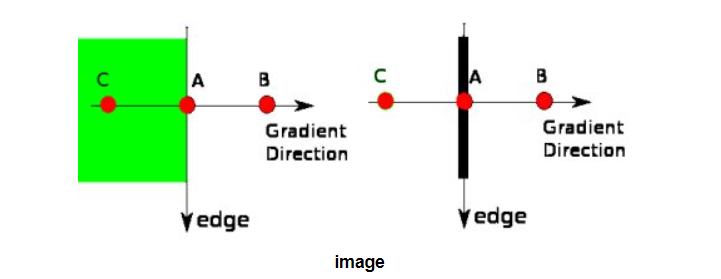

Điểm A nằm trên cạnh (theo hướng thẳng đứng). Hướng gradient vuông góc với cạnh. Điểm B và C theo hướng gradient. Vì vậy, điểm A được kiểm tra với điểm B và C để xem liệu nó có tạo thành cực đại cục bộ hay không. Nếu có, nó được xem xét cho giai đoạn tiếp theo, nếu không, nó sẽ bị loại bỏ (đặt về 0).

Nói tóm lại, kết quả bạn nhận được là một hình ảnh nhị phân có "các cạnh mỏng".

**Ngưỡng trễ**

Giai đoạn này quyết định tất cả các cạnh nào thực sự là cạnh và cạnh nào không. Đối với điều này, chúng ta cần hai giá trị ngưỡng, minVal và maxVal. Bất kỳ cạnh nào có độ dốc cường độ lớn hơn maxVal chắc chắn là cạnh và những cạnh dưới minVal chắc chắn là không phải cạnh, do đó bị loại bỏ. Những cạnh nằm giữa hai ngưỡng này được phân loại là cạnh hoặc không phải cạnh dựa trên khả năng kết nối của chúng. Nếu chúng được kết nối với các pixel "sure-edge", chúng được coi là một phần của các cạnh. Nếu không, chúng cũng bị loại bỏ. Xem hình ảnh bên dưới:

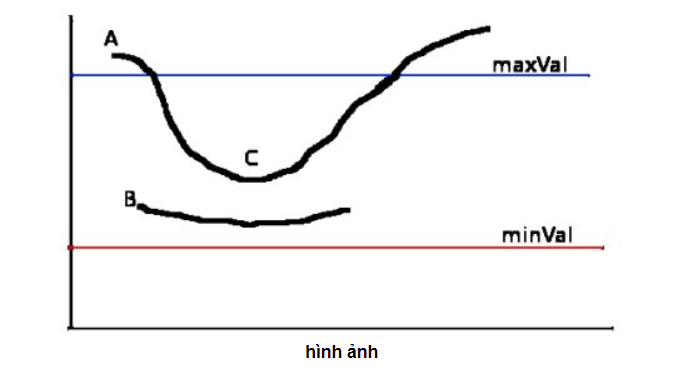

Cạnh A nằm trên maxVal, do đó được coi là "sure-edge". Mặc dù cạnh C nằm dưới maxVal, nhưng nó được kết nối với cạnh A, do đó cũng được coi là cạnh hợp lệ và chúng ta có được đường cong đầy đủ đó. Nhưng cạnh B, mặc dù nằm trên minVal và nằm trong cùng vùng với cạnh C, nhưng nó không được kết nối với bất kỳ "sure-edge" nào, do đó bị loại bỏ. Vì vậy, điều rất quan trọng là chúng ta phải chọn minVal và maxVal tương ứng để có được kết quả chính xác.

Giai đoạn này cũng loại bỏ các điểm ảnh nhiễu nhỏ dựa trên giả định rằng các cạnh là các đường dài.

Vậy thì cuối cùng chúng ta có được các cạnh sắc nét trong hình ảnh.

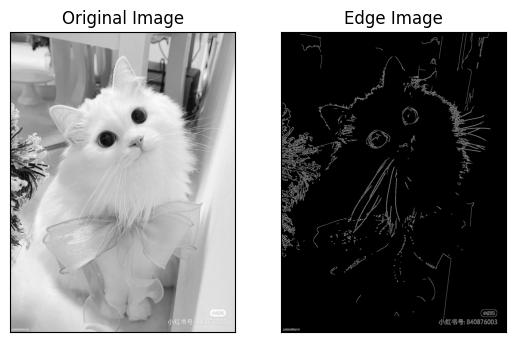

In [110]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

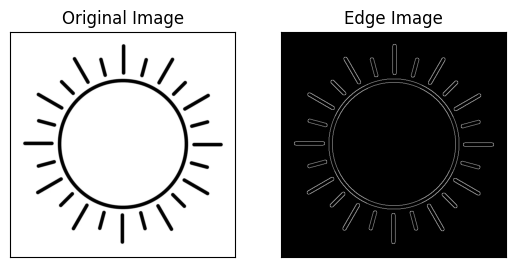

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('sun.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()